In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# Loading Data

In [2]:
df_train = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')

In [3]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Exploratory Data Analysis

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [5]:
df_train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [6]:
df_train.isna().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

#### Relation between the Antivirus Product name and the Target values
This suggests that the win8defender is the majority product

<Figure size 200x100 with 0 Axes>

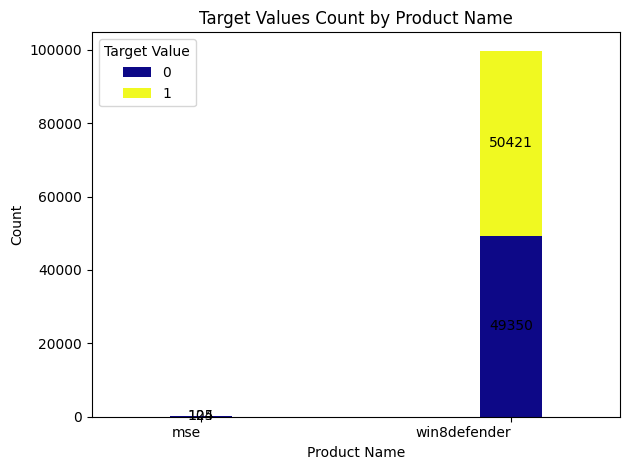

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_train
# Group data by product_name and calculate sum of target values
product_target_sum = df.groupby('ProductName')['target'].value_counts().unstack(fill_value=0).copy()

# Plotting
plt.figure(figsize=(2, 1))
bars = product_target_sum.plot(kind='bar', stacked=True, width=0.2, colormap='plasma')

for bar_container in bars.containers:
    bars.bar_label(bar_container, label_type='center')
    
plt.title('Target Values Count by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.legend(title='Target Value', labels=['0', '1'])
plt.xticks(rotation=0, ha='right')
plt.tight_layout()

plt.show()


#### Relation between OSVersion and Target Values


<Figure size 200x100 with 0 Axes>

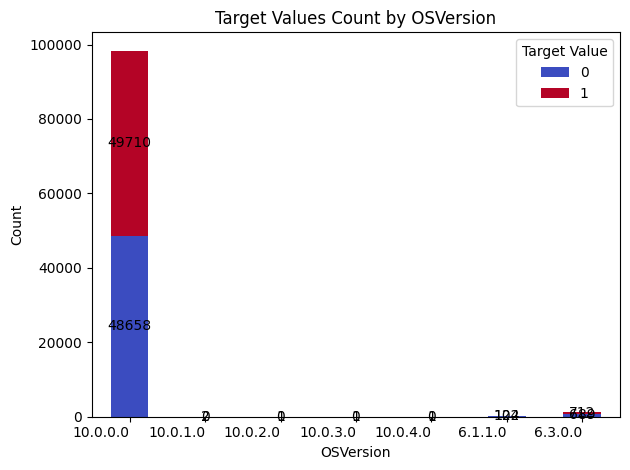

In [8]:
osversion_target_sum = df.groupby('OSVersion')['target'].value_counts().unstack(fill_value=0).copy()

plt.figure(figsize=(2, 1))
bars = osversion_target_sum.plot(kind='bar', stacked=True, width=0.5, colormap='coolwarm')

for bar_container in bars.containers:
    bars.bar_label(bar_container, label_type='center')
    
plt.title('Target Values Count by OSVersion')
plt.xlabel('OSVersion')
plt.ylabel('Count')
plt.legend(title='Target Value', labels=['0', '1'])
plt.xticks(rotation=0, ha='right')
plt.tight_layout()

plt.show()

#### Relation Between FirewallEnabled and Target values
**Observation:- No great influence seen whether the firewall is enabled or not.**

<Figure size 200x100 with 0 Axes>

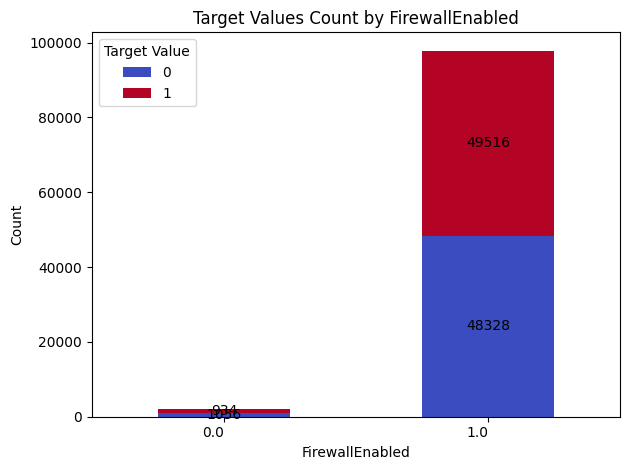

In [9]:
firewallEnabled_target_sum = df.groupby('FirewallEnabled')['target'].value_counts().unstack(fill_value=0).copy()

plt.figure(figsize=(2, 1))
bars = firewallEnabled_target_sum.plot(kind='bar', stacked=True, width=0.5, colormap='coolwarm')

for bar_container in bars.containers:
    bars.bar_label(bar_container, label_type='center')
    
plt.title('Target Values Count by FirewallEnabled')
plt.xlabel('FirewallEnabled')
plt.ylabel('Count')
plt.legend(title='Target Value', labels=['0', '1'])
plt.xticks(rotation=0, ha='right')
plt.tight_layout()

plt.show()

#### Combined Effect of Secure Boot and OSVersion
**No significance of secure boot enabled or not.**

<Figure size 200x100 with 0 Axes>

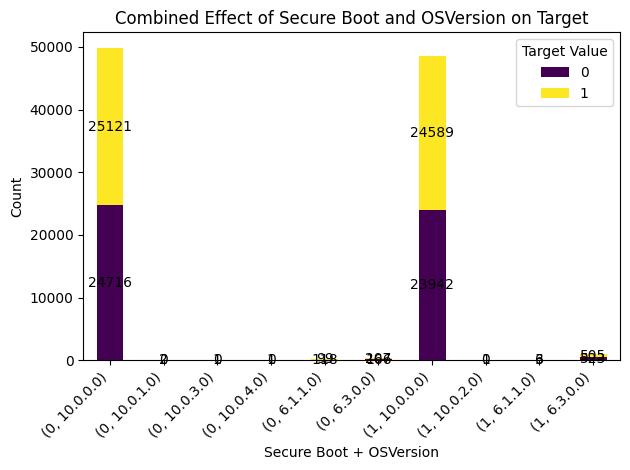

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

combined_data = df.groupby(['IsSecureBootEnabled', 'OSVersion'])['target'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(2,1))
combined_data.plot(kind='bar', stacked=True, colormap='viridis')

# Add value labels
for bar_container in plt.gca().containers:
    plt.gca().bar_label(bar_container, label_type='center')

# Customize plot
plt.title('Combined Effect of Secure Boot and OSVersion on Target')
plt.xlabel('Secure Boot + OSVersion')
plt.ylabel('Count')
plt.legend(title='Target Value', labels=['0', '1'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


#### Gamer Vs Threat
**Even though the number of gamers is low, but if calculated they are roughly 7-8% more affected.**

<Figure size 200x100 with 0 Axes>

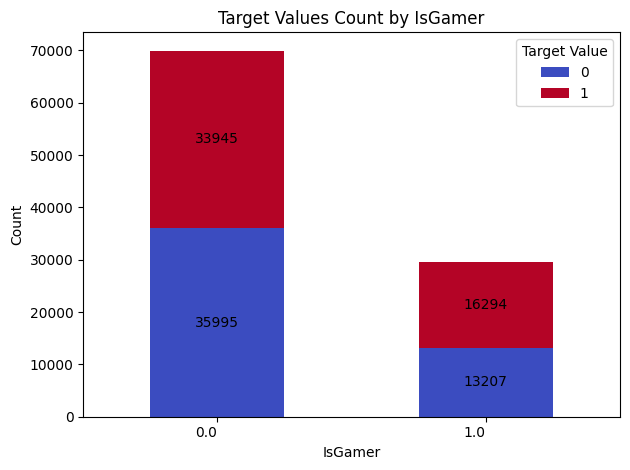

In [11]:
IsGamer_target_sum = df.groupby('IsGamer')['target'].value_counts().unstack(fill_value=0).copy()

plt.figure(figsize=(2, 1))
bars = IsGamer_target_sum.plot(kind='bar', stacked=True, width=0.5, colormap='coolwarm')

for bar_container in bars.containers:
    bars.bar_label(bar_container, label_type='center')
    
plt.title('Target Values Count by IsGamer')
plt.xlabel('IsGamer')
plt.ylabel('Count')
plt.legend(title='Target Value', labels=['0', '1'])
plt.xticks(rotation=0, ha='right')
plt.tight_layout()

plt.show()

<Axes: xlabel='IsGamer', ylabel='TotalPhysicalRAMMB'>

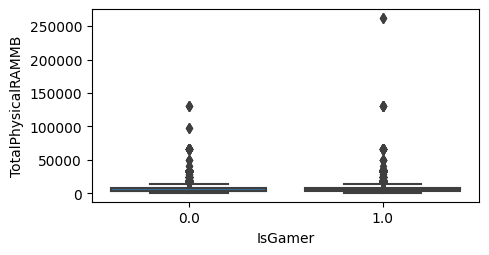

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2.5))
sns.boxplot(x=df_train['IsGamer'], y=df_train['TotalPhysicalRAMMB'])

Class Distribution:
 target
1    50525
0    49475
Name: count, dtype: int64


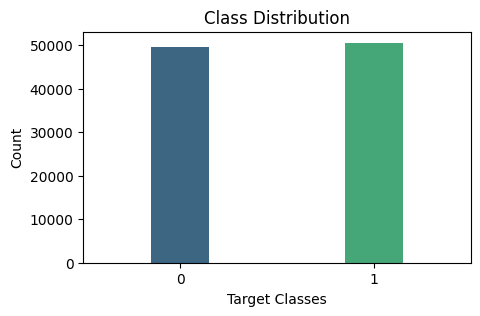

Imbalance Ratio: 0.9792


In [13]:
class_counts = df_train['target'].value_counts()

# Display class counts
print("Class Distribution:\n", class_counts)

# Plotting the class distribution
plt.figure(figsize=(5,3))
sns.barplot(x=class_counts.index, y=class_counts.values, width=0.3, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.show()

# Calculate imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.4f}")

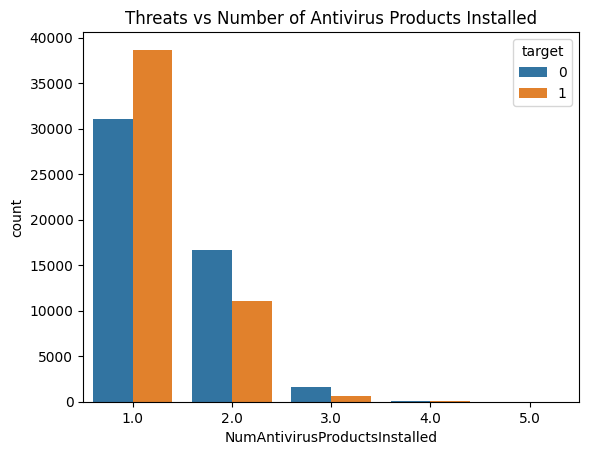

In [14]:
sns.countplot(x='NumAntivirusProductsInstalled', hue='target', data=df_train)
plt.title('Threats vs Number of Antivirus Products Installed')
plt.show()

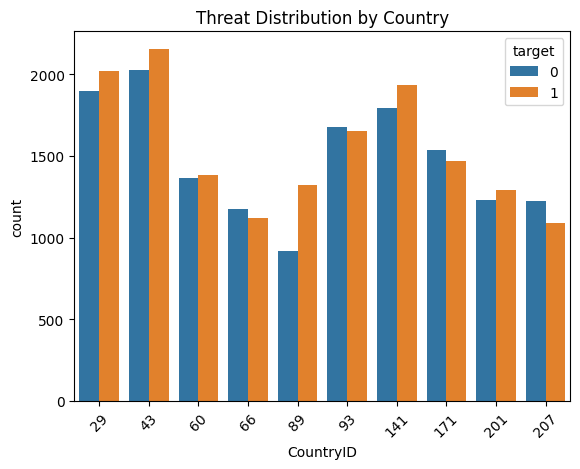

In [15]:
top_countries = df_train['CountryID'].value_counts().head(10).index
sns.countplot(x='CountryID', data=df_train[df_train['CountryID'].isin(top_countries)], hue='target')
plt.xticks(rotation=45)
plt.title('Threat Distribution by Country')
plt.show()

### Function for outlier detection and replacing outliers

In [16]:
def calculate_iqr_bounds(df, column):
    col_values = df[column].replace([np.inf, -np.inf], np.nan).dropna()  # Ignore NaN and Inf
    if col_values.empty:  # Handle cases where all values are NaN
        return np.nan, np.nan

    Q1 = col_values.quantile(0.25)
    Q3 = col_values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def replace_outliers(df, column, lower_bound, upper_bound):
    # Ensure we only apply bounds to valid numbers
    df[column] = df[column].apply(
        lambda x: x if pd.isna(x) else max(min(x, upper_bound), lower_bound)
    )
    return df

def process_outliers(df):
    df_cleaned = df.copy()
    for col in df_cleaned.select_dtypes(include=['number']).columns:
        lower, upper = calculate_iqr_bounds(df_cleaned, col)
        
        if not np.isnan(lower) and not np.isnan(upper):  # Avoid applying NaN bounds
            df_cleaned = replace_outliers(df_cleaned, col, lower, upper)
    
    return df_cleaned

df_cleaned = process_outliers(df_train)

### Preprocessing

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

data = df_cleaned

# Separate features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

def preprocess_miles5(X):
    # Identify categorical and numeric columns
    cat_cols = X.select_dtypes(include=['object', 'category']).columns
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns
    
    # Preprocessing for categorical data
    cat_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ])
    
    # Preprocessing for numeric data
    num_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean'))
    ])
    
    # Combine both into ColumnTransformer
    preprocessor = ColumnTransformer([
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])
    
    # Full pipeline with final scaling step
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler())  # Scaling applied after full transformation
    ])
    
    return pipeline.fit_transform(X)
    
X_processed = preprocess_miles5(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(80000, 75) (20000, 75)


### Model 1 - Logistic Regression Model

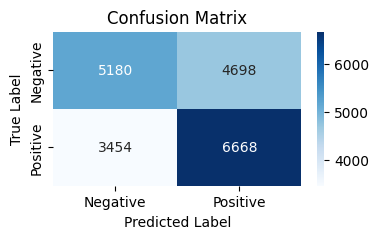

LogisticRegression(C=0.0010071984838809194, max_iter=500, random_state=42,
                   solver='liblinear', warm_start=True)
Samples that have been correctly classified: 11848
Samples belonging to Class 0 misclassified as Class 1: 4698
Recall for Class 1: 0.66
              precision    recall  f1-score   support

           0       0.60      0.52      0.56      9878
           1       0.59      0.66      0.62     10122

    accuracy                           0.59     20000
   macro avg       0.59      0.59      0.59     20000
weighted avg       0.59      0.59      0.59     20000

0.5924


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report

# Logistic Regression model
lr = LogisticRegression(random_state=42, solver='liblinear', max_iter=500, warm_start=True)

# Hyperparameter search space
param_dist = {
    'C': loguniform(0.001, 10), 
    'penalty': ['l1', 'l2']
}

# Randomized Search for optimal hyperparameters
random_search = RandomizedSearchCV(lr, param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best Logistic Regression Model
best_lr = random_search.best_estimator_
y_pred = best_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(best_lr)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_correct_classified = int(lr_accuracy * len(y_test))
print("Samples that have been correctly classified:", lr_correct_classified)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_false_positives = lr_conf_matrix[0, 1]  # Class 0 misclassified as Class 1
print("Samples belonging to Class 0 misclassified as Class 1:", lr_false_positives)

lr_recall_1 = round(recall_score(y_test, y_pred, pos_label=1), 2)
print("Recall for Class 1:", lr_recall_1)
print(classification_report(y_test, y_pred))
print(lr_accuracy)

### Model 2 - Decision Tree Classifier

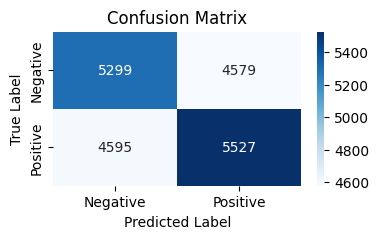

Samples that have been correctly classified: 10826
Samples belonging to Class 1 misclassified as Class 0: 4595
Precision for Class 0: 0.54
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      9878
           1       0.55      0.55      0.55     10122

    accuracy                           0.54     20000
   macro avg       0.54      0.54      0.54     20000
weighted avg       0.54      0.54      0.54     20000

0.5413


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

dtc_model = DecisionTreeClassifier(random_state = 42)
dtc_model.fit(X_train, y_train)

y_pred = dtc_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
dtc_accuracy = accuracy_score(y_pred, y_test)
dtc_correct_classified = int(dtc_accuracy * len(y_test))
print("Samples that have been correctly classified:", dtc_correct_classified)

dtc_conf_matrix = confusion_matrix(y_test, y_pred)
dtc_false_negatives = dtc_conf_matrix[1, 0] # Class 1 misclassified as Class 0
print("Samples belonging to Class 1 misclassified as Class 0:", dtc_false_negatives)

dtc_precision_0 = round(precision_score(y_test, y_pred, pos_label =0), 2)
print("Precision for Class 0:", dtc_precision_0)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

### Model 3 - Random Forest Classifier (Main Model)
The parameters were selected randomly as not by randomizedsearchcv as it was a time talking process.

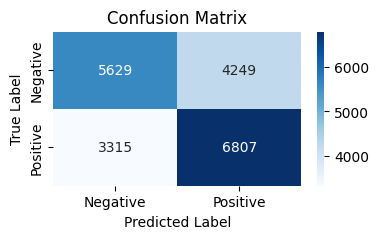

              precision    recall  f1-score   support

           0       0.63      0.57      0.60      9878
           1       0.62      0.67      0.64     10122

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000

Validation Accuracy:  0.62


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


# Define Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=500, max_depth=30, min_samples_split=2,
                                  warm_start=True, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy_rounded = round(rf_accuracy, 2)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))
print("Validation Accuracy: ", rf_accuracy_rounded)

# Model comparison
As the accuracy was higher for Random Forest Classifier it was chosen as the main model to be evaluated.

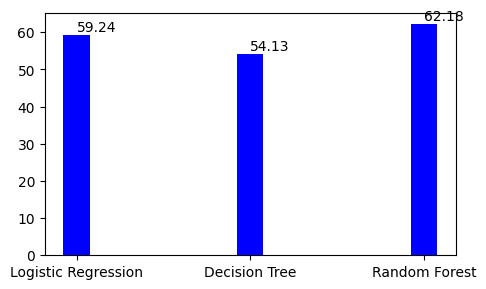

In [21]:
accuracy = np.array([lr_accuracy,dtc_accuracy, rf_accuracy])*100
models = ['Logistic Regression','Decision Tree','Random Forest']
fig, ax = plt.subplots(figsize = (5,3))

ax.bar(models, accuracy, width=0.15, color ='blue')
for index,data in enumerate(accuracy):
    plt.text(x=index , y =data+1 , s="{:.2f}".format(data) , fontsize=10)
plt.tight_layout()
plt.show()

# Importing test data & Preprocessing

In [22]:
df_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

df_test_cleaned = process_outliers(df_test)
df_test_transformed = preprocess_miles5(df_test_cleaned)
y_pred = rf_model.predict(df_test_transformed)

# Submission 

In [23]:
# import os
# os.remove("/kaggle/working/submission.csv")
submission = pd.DataFrame({'id': range(0, df_test.shape[0]),
                          'target': y_pred})
submission.shape
submission.to_csv('submission.csv', index=False)